# Проект: классификация

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [180]:
df = pd.read_csv('data/bank_fin.zip', sep = ';')

In [181]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
print(df.info())
print(df.balance.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB
None
25


### Задание 2

In [182]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
print(df.job.unique())
print(df.education.unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['secondary' 'tertiary' 'primary' 'unknown']


### Задание 3

In [183]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df.balance = df.balance.apply(lambda x: float(str(x).replace(',', '.').replace(' ', '').replace('$', '')))

In [184]:
round(df.balance.mean(), 3)

1529.129

### Задание 4

In [185]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df.balance.fillna(df.balance.median(), inplace=True)

In [186]:
round(df.balance.mean(), 3)

1526.936

### Задание 5

In [187]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['job'] = df.job.apply(lambda x: df.job.mode()[0] if x == 'unknown' else x )
df['education'] = df.education.apply(lambda x: df.education.mode()[0] if x == 'unknown' else x )

In [188]:
round(df[(df['job'] == df['job'].mode()[0]) & (df['education'] == df['education'].mode()[0])].balance.mean(),3)

1598.883

In [189]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Изучите признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха () , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. (). Найдите эти границы, и отфильтруйте значения так, чтобы выбросов в данных не осталось.

Примечание. Несмотря на то что существуют более продвинутые методы поиска аномальных значений, для обработки одного числового признака достаточно хорошо подходит метод Тьюки. После решения задачи вы сможете попробовать применить и другие методы, оценив их влияние на качество поиска.

<Axes: xlabel='balance', ylabel='Count'>

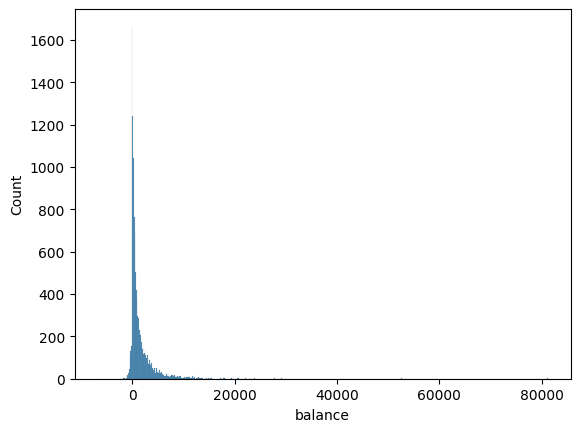

In [190]:
sns.histplot(df['balance'])

In [191]:
outliers, cleaned = outliers_iqr_mod(df, 'balance')
outliers.count()

age          922
job          922
marital      922
education    922
default      922
balance      922
housing      922
loan         922
contact      922
day          922
month        922
duration     922
campaign     922
pdays        922
previous     922
poutcome     922
deposit      922
dtype: int64

### Задание 6

<Axes: xlabel='balance', ylabel='Count'>

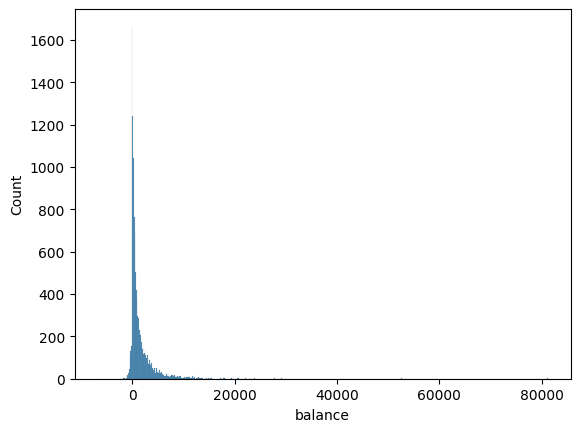

In [192]:
# удалите все выбросы для признака balance
# ваш код
sns.histplot(df['balance'])


In [193]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [194]:
outliers, cleaned = outliers_iqr_mod(df, 'balance', log_scale=False)
outliers.count()

age          1057
job          1057
marital      1057
education    1057
default      1057
balance      1057
housing      1057
loan         1057
contact      1057
day          1057
month        1057
duration     1057
campaign     1057
pdays        1057
previous     1057
poutcome     1057
deposit      1057
dtype: int64

In [195]:
quartile_1, quartile_3 = df.balance.quantile(0.25), df.balance.quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

print(lower_bound, upper_bound)

-2241.0 4063.0


In [196]:
cleaned.count()

age          10105
job          10105
marital      10105
education    10105
default      10105
balance      10105
housing      10105
loan         10105
contact      10105
day          10105
month        10105
duration     10105
campaign     10105
pdays        10105
previous     10105
poutcome     10105
deposit      10105
dtype: int64

In [197]:
df = cleaned

## Часть 2:  Разведывательный анализ

### Задание 1

In [198]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
df.deposit.value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

### Задания 2 и 3

In [199]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Предварительно анализируя данные можно сказать следующее:
age: В джанных скорее всего нет выбросов и распределены они нормально

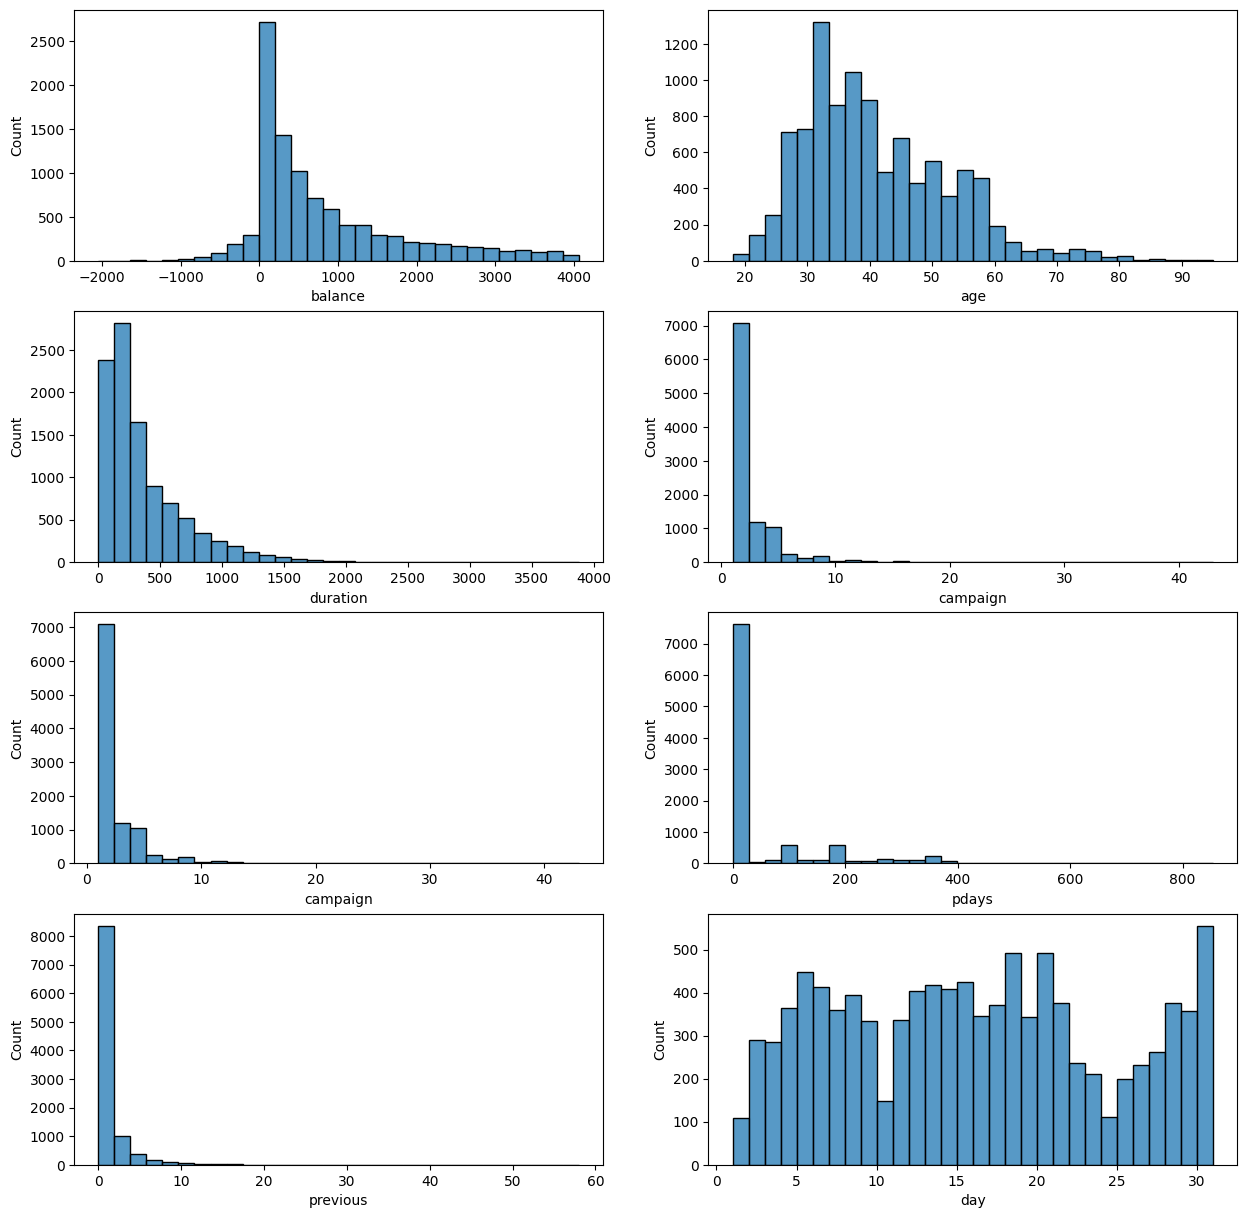

In [200]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

histplot = sns.histplot(df['balance'], bins=30, ax=axes[0, 0])
# histplot.set_title('balance');

histplot = sns.histplot(df['age'], bins=30, ax=axes[0, 1])
# histplot.set_title('age');

histplot = sns.histplot(df['duration'], bins=30, ax=axes[1, 0])
# histplot.set_title('duration')

histplot = sns.histplot(df['campaign'], bins=30, ax=axes[1, 1])
# histplot.set_title('campaign')

histplot = sns.histplot(df['campaign'], bins=30, ax=axes[2, 0])
# histplot.set_title('campaign')

histplot = sns.histplot(df['pdays'], bins=30, ax=axes[2, 1])
# histplot.set_title('pdays')

histplot = sns.histplot(df['previous'], bins=30, ax=axes[3, 0])
# histplot.set_title('previous')

histplot = sns.histplot(df['day'], bins=30, ax=axes[3, 1])

*Предварительные выводы*

Предварительно анализируя данные можно сказать следующее:
age: В джанных скорее всего нет выбросов и данные распределены нормально
balance: Выбросы были удалены данные распределены Логнормально
duration и campaing скорее всего имеют выбросы. Данные распределены логнормально
day выбросов не имеет имеет примерно равномерное распределение
pdays и count скорее всего имеют выбросы арспределение логнормальное


### Задания 4 и 5

In [201]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
df.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


*Предварительные выводы*

Клиенты работающие менеджарами составляют наибольшую часть клиентов сопоставляя по профессиям.
Больше половины клиентов состоят в браке.
Больше половины клиентов имеют среднее образование.
У клиентов почти нет просроченных кредитова.
Половина клиентов имеет ипотеку.
Подавляющее большинство клиентов имеют кредиты на личныек нужны.
С подавляющим большинством клиентов контакт осуществляется по мобильной связи.
Компания скорее всего закончилась в мае
Для большей части клиентов результат прошлой компании неизвестен.
Только половина клиентов имеет депозит в банке.


### Задание 6

In [202]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
# pd.pivot_table(df, index=['poutcome', 'deposit'], values='deposit', aggfunc='count')
df[['poutcome', 'deposit', 'age']].groupby(by = ['poutcome', 'deposit']).count()

age
poutcome deposit      
failure  no        562
         yes       547
other    no        216
         yes       265
success  no         84
         yes       861
unknown  no       4562
         yes      3008

### Задание 7

In [203]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
# month = df[['month', 'deposit', 'age']].groupby(by = ['deposit']).count()

month = pd.pivot_table(df[['month', 'deposit', 'age']], index=['deposit'], columns='month', aggfunc='count')

for i in month.columns:
    print(i[1], '  ', month[i].loc['no']/month[i].sum())


apr    0.3819277108433735
aug    0.5595667870036101
dec    0.0967741935483871
feb    0.45557122708039494
jan    0.6081504702194357
jul    0.5895627644569816
jun    0.5489130434782609
mar    0.10126582278481013
may    0.6786396637371036
nov    0.5846153846153846
oct    0.18507462686567164
sep    0.16546762589928057


### Задание 8

In [204]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age(x):
    if x < 30:
        return '<30'
    elif 30 <= x < 40:
        return '30-40'
    elif 40 <= x < 50:
        return '40-50'
    elif 50 <= x < 60:
        return '50-60'
    else:
        return '60+'



df['age_text'] = df.age.apply(age)

In [205]:
age_df = pd.pivot_table(data=df[['campaign', 'age_text', 'deposit']], columns=['age_text', 'deposit'], aggfunc='count')

deposit = {}
for i in df['age_text'].unique():
    deposit[i] =  age_df[i, 'yes']/(age_df[i, 'yes'] + age_df[i, 'no'])
    
deposit

{'50-60': campaign    0.405079
 dtype: float64,
 '40-50': campaign    0.393787
 dtype: float64,
 '60+': campaign    0.759571
 dtype: float64,
 '30-40': campaign    0.433224
 dtype: float64,
 '<30': campaign    0.591753
 dtype: float64}

[Text(0.5, 0, 'age_rate'), Text(0, 0.5, 'deposit_percent')]

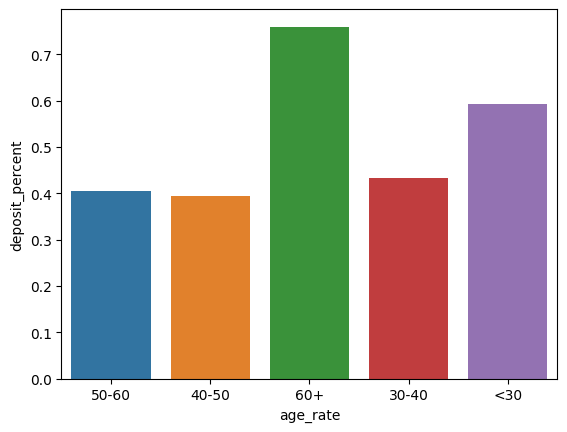

In [206]:
ax = sns.barplot(deposit)
ax.set(xlabel='age_rate', ylabel='deposit_percent')

### Задания 9 и 10

In [207]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
marital_df = pd.pivot_table(data=df[['campaign', 'marital', 'deposit']], columns=['marital', 'deposit'], aggfunc='count')

deposit = {}
for i in df['marital'].unique():
    deposit[i] =  marital_df[i, 'yes']/(marital_df[i, 'yes'] + marital_df[i, 'no'])

deposit

{'married': campaign    0.422047
 dtype: float64,
 'single': campaign    0.53408
 dtype: float64,
 'divorced': campaign    0.469839
 dtype: float64}

[Text(0.5, 0, 'marital'), Text(0, 0.5, 'deposit_percent')]

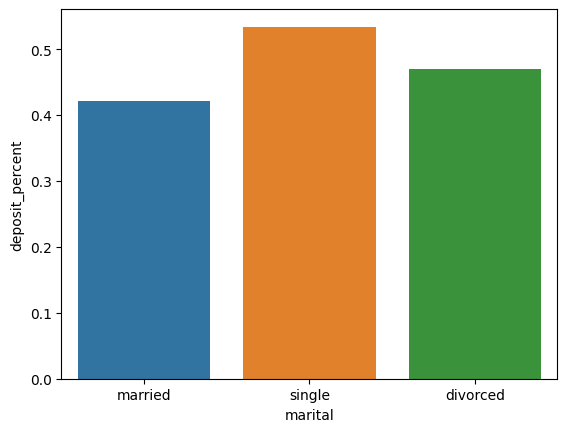

In [208]:
ax = sns.barplot(deposit)
ax.set(xlabel='marital', ylabel='deposit_percent')

In [209]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
education_df = pd.pivot_table(data=df[['campaign', 'education', 'deposit']], columns=['education', 'deposit'], aggfunc='count')

deposit = {}
for i in df['education'].unique():
    deposit[i] =  education_df[i, 'yes']/(education_df[i, 'yes'] + education_df[i, 'no'])

[Text(0.5, 0, 'education'), Text(0, 0.5, 'deposit_percent')]

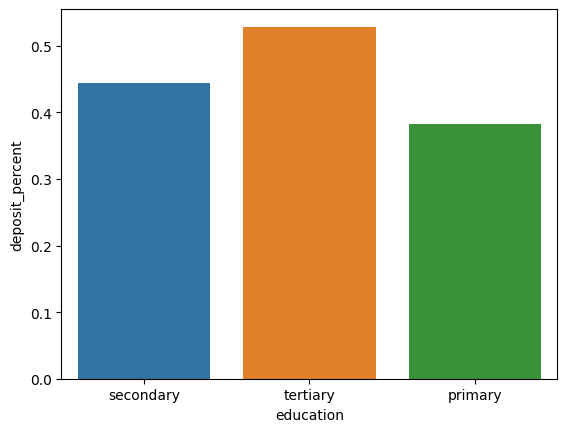

In [210]:
ax = sns.barplot(deposit)
ax.set(xlabel='education', ylabel='deposit_percent')

In [211]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

job_df = pd.pivot_table(data=df[['campaign', 'job', 'deposit']], columns=['job', 'deposit'], aggfunc='count')

deposit = {}
for i in df['job'].unique():
    deposit[i] =  job_df[i, 'yes']/(job_df[i, 'yes'] + job_df[i, 'no'])

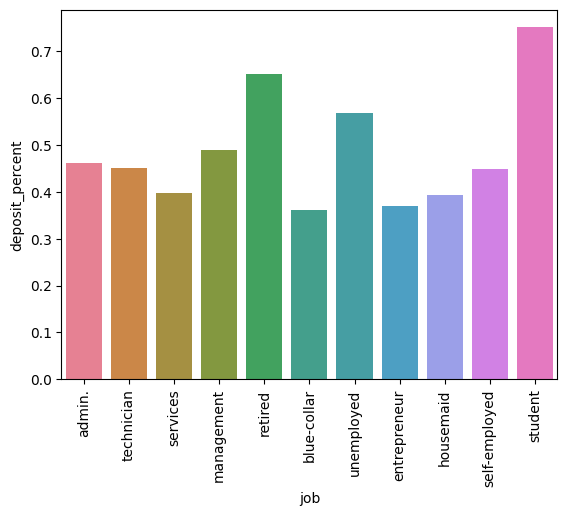

In [212]:
ax = sns.barplot(deposit, )
ax.set(xlabel='job', ylabel='deposit_percent')
ax.tick_params(axis='x', rotation=90)

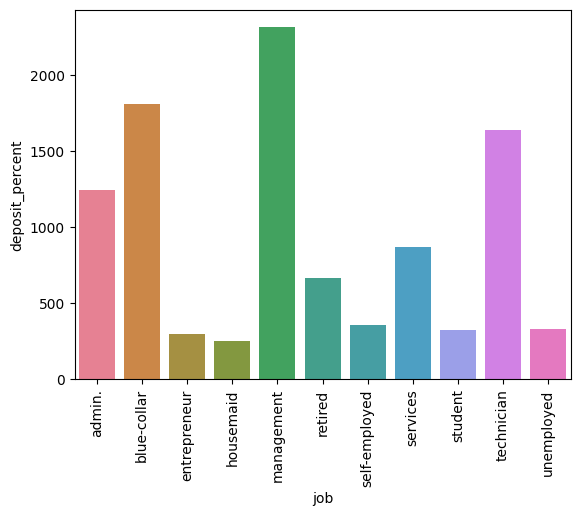

In [213]:
job_df = pd.pivot_table(data=df[['campaign', 'job']], columns=['job'], aggfunc='count')

ax = sns.barplot(job_df, )
ax.set(xlabel='job', ylabel='deposit_percent')
ax.tick_params(axis='x', rotation=90)

### Задание 11

In [214]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
deposit_approved =  df[df['deposit'] == 'yes']
deposit_approved = pd.pivot_table(data=deposit_approved[['campaign', 'marital', 'education']], columns='marital', index='education', aggfunc='count')

deposit_not_approved  =  df[df['deposit'] == 'no']
deposit_not_approved = pd.pivot_table(data=deposit_not_approved[['campaign', 'marital', 'education']], columns='marital', index='education', aggfunc='count')

[Text(0.5, 1.0, 'deposit not approved')]

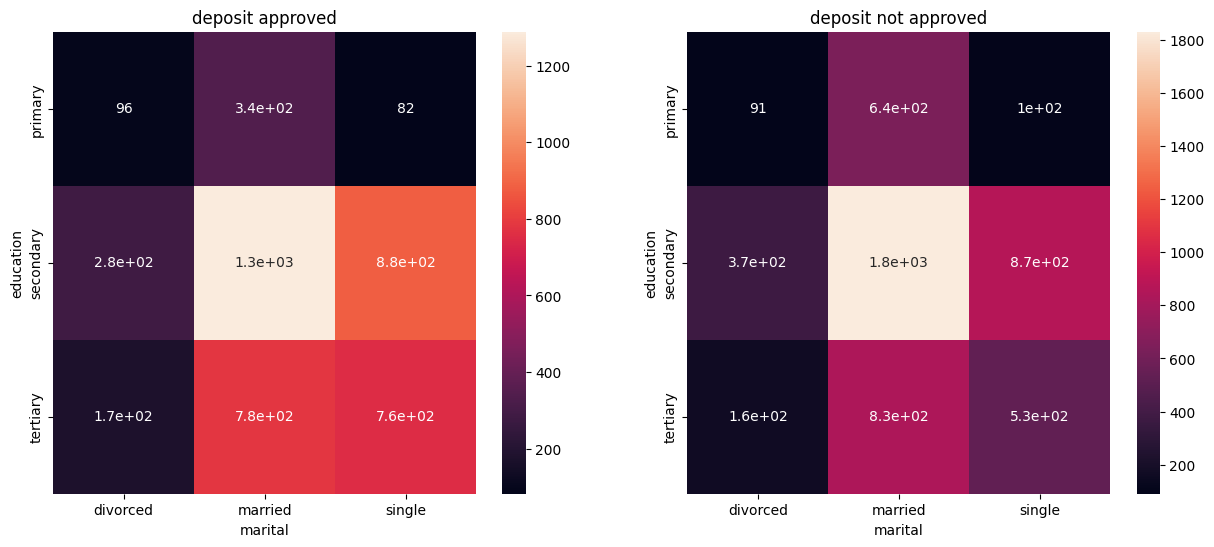

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = sns.heatmap(deposit_approved['campaign'], annot=True,  ax=axes[0])
ax1.set(title='deposit approved')
ax2 = sns.heatmap(deposit_not_approved['campaign'], annot=True,  ax=axes[1])
ax2.set(title='deposit not approved')

## Часть 3: преобразование данных

### Задание 1

In [216]:
# преобразуйте уровни образования
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [217]:
df['education'].sum()

11995

### Задания 2 и 3

In [218]:
# преобразуйте бинарные переменные в представление из нулей и единиц
def binary(x):
    return 1 if x == 'yes' else 0

In [219]:
df['deposit'] = df['deposit'].apply(binary)
df['default'] = df['default'].apply(binary)
df['housing'] = df['housing'].apply(binary)
df['loan'] = df['loan'].apply(binary)

In [220]:
print(df['default'].mean() + df['housing'].mean() + df['loan'].mean())

0.6354280059376547


### Задание 4

In [221]:
# создайте дамми-переменные
# df['age'] = df['age_text']
df = df.drop('age_text', axis=1)

In [222]:
df_dummy = pd.get_dummies(df[['job', 'marital', 'contact', 'month', 'poutcome']])

In [224]:
df = pd.concat([df_dummy, df], axis=1)
len(df.columns)

50

In [225]:
df = df.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

### Задания 5 и 6

In [230]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
correlation_matrix = df.corr()

<Axes: >

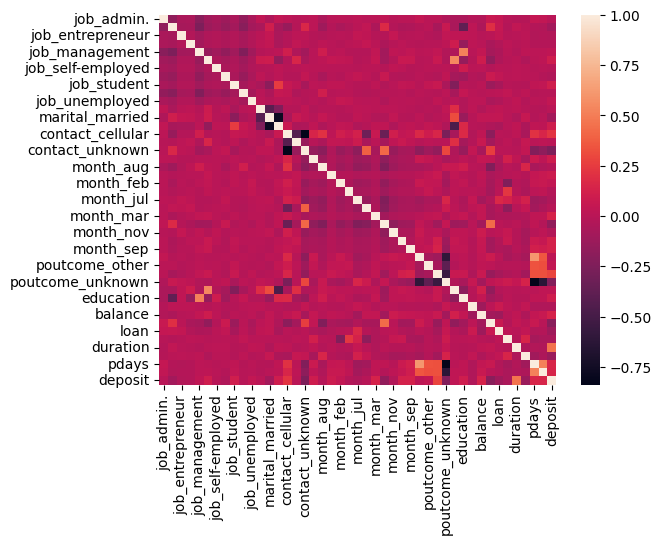

In [238]:
sns.heatmap(correlation_matrix, )

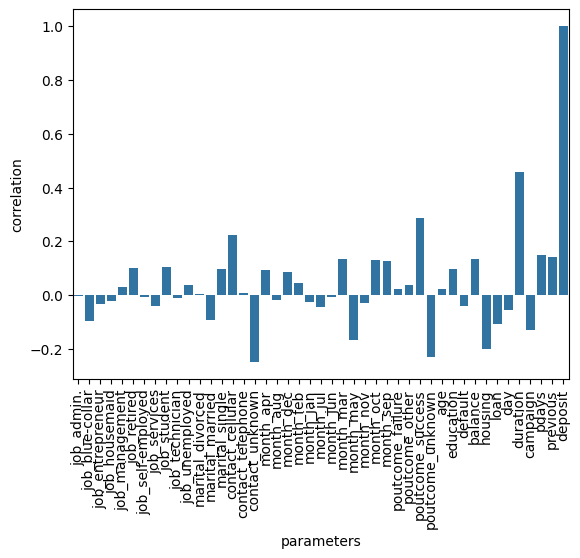

In [239]:
ax = sns.barplot(correlation_matrix['deposit'], )
ax.set(xlabel='parameters', ylabel='correlation')
ax.tick_params(axis='x', rotation=90)

In [240]:
correlation_matrix

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
job_admin.,1.000000,-0.175008,-0.065600,-0.059977,-0.204444,-0.099378,-0.071874,-0.114964,-0.068474,-0.164952,...,-0.022421,-0.028057,0.063547,0.049098,-0.010680,-0.023585,-0.018834,0.046293,0.030985,-0.001927
job_blue-collar,-0.175008,1.000000,-0.081626,-0.074629,-0.254389,-0.123657,-0.089433,-0.143050,-0.085203,-0.205251,...,0.022989,-0.049484,0.194115,0.056857,-0.019876,0.032253,0.002430,-0.024269,-0.031299,-0.095845
job_entrepreneur,-0.065600,-0.081626,1.000000,-0.027974,-0.095355,-0.046351,-0.033523,-0.053621,-0.031937,-0.076936,...,0.023264,-0.008727,0.006600,0.038298,-0.005463,0.000594,0.011168,-0.026802,-0.019716,-0.032706
job_housemaid,-0.059977,-0.074629,-0.027974,1.000000,-0.087181,-0.042378,-0.030649,-0.049024,-0.029200,-0.070341,...,0.019273,0.000907,-0.063824,-0.028973,0.010920,-0.010009,0.008832,-0.023625,-0.021409,-0.022572
job_management,-0.204444,-0.254389,-0.095355,-0.087181,1.000000,-0.144455,-0.104475,-0.167110,-0.099533,-0.239772,...,-0.000055,0.039205,-0.077697,-0.052683,0.003025,-0.024309,0.018159,0.010868,0.013374,0.029566
job_retired,-0.099378,-0.123657,-0.046351,-0.042378,-0.144455,1.000000,-0.050784,-0.081231,-0.048382,-0.116551,...,-0.018524,0.091421,-0.168785,-0.045674,-0.005226,0.006052,-0.037189,0.007287,0.017963,0.100090
job_self-employed,-0.071874,-0.089433,-0.033523,-0.030649,-0.104475,-0.050784,1.000000,-0.058749,-0.034992,-0.084294,...,0.008924,0.009889,-0.019555,0.004113,0.001565,0.014513,0.006299,-0.012057,0.000904,-0.005194
job_services,-0.114964,-0.143050,-0.053621,-0.049024,-0.167110,-0.081231,-0.058749,1.000000,-0.055970,-0.134830,...,-0.020168,-0.037633,0.080129,0.032109,0.002787,0.013911,0.009145,-0.002427,-0.019909,-0.040433
job_student,-0.068474,-0.085203,-0.031937,-0.029200,-0.099533,-0.048382,-0.034992,-0.055970,1.000000,-0.080307,...,-0.019190,0.007133,-0.124261,-0.071385,-0.010712,-0.017974,-0.023710,0.025137,0.037421,0.105563
job_technician,-0.164952,-0.205251,-0.076936,-0.070341,-0.239772,-0.116551,-0.084294,-0.134830,-0.080307,1.000000,...,0.004419,-0.010460,0.004772,0.009501,0.031050,-0.007488,0.022406,-0.017993,-0.007059,-0.011190


### Задания 7 и 8

In [241]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [248]:
# рассчитайте необходимые показатели
print(y_test.size)
print(round(y_test.mean(), 2))

3335
0.46


### Задание 9

In [38]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [39]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [40]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [41]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [42]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [43]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [44]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [45]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [46]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [47]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna